**Integrantes**: Manuel Hernandez Martinez , Luis Moreno Diaz, Wilmer Urango Narvaez, Ivan Alvarez Gomez y Luis Durango Suarez.

**Breve descripción:** La base de datos a explorar se llama  **"mdl_informes_2022_1_user_loggedin"**, contiene información del loggedin de los estudiantes de la Universidad de Córdoba en la plataforma Cintia, entre las variables mas relevantes con las que se cuenta en esta data estan **usr_username:Usuario** , **timecreated_unix: Fecha de conexión** y  **prog_programa: Programa Academico**, tambien se encuenta con otras variables, pero no resultan muy relevantes, bien sea por tener valores unicos, la auxencia de datos o porque no presentan una caracteristica relevante en temas de interpretación.


# Cargue su dataset, limpio, e imprima los 10 primeros registros.

En la data se encontro 21 variables que tenian todos los valores faltantes o tenian el mismo valor en toda la columna, para estas variables se verificara dicho supuesto y posteriormte se eliminaron de la base de datos, tambien se escluyeron 7 variables que no se utilizaron en la descripción  de nuestros datos, ademas dado que l  **timecreated_unix** no tenia el formato fecha, se procede a crear una nueva variable la cual se llamo **timecreated** y tiene el formato fecha y hora. 

In [2]:
# Importando modulos de análisis
import warnings
import holidays
from datetime import date
import plotly
import json
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [3]:
# Leyendo los datos
# pd.read_csv(data/mdl_informes_2022_1_user_loggedin.csv,sep=';')
Loggedin = pd.read_csv(
    "C:/Users/Wilmer/Documents/DIPLOMADO/AnalisisDeDatos/env/project_unicor/Grupo1_HernandezMorenoUrangoAlvarezDurango/mdl_informes_2022_1_user_loggedin.csv", sep=";")


In [4]:
Loggedin["timecreated"] = pd.to_datetime(
    Loggedin["timecreated_unix"], unit="s")
Variables = np.array(["eventname", "component", "action", "target", "objecttable", "crud", "edulevel",
                      "courseid", "relateduserid", "origin", "realuserid", "cur_id", "cur_idnumber",
                      "cur_shortname", "cur_fullname", "cur_category", "cur_startdate", "cur_enddate",
                      "prog_id", "prog_idnumber", "fac_idnumber", "fac_facultad", "id", "userid", "other",
                      "timecreated_unix", "ip", "usr_id", "usr_idnumber"])
Loggedin.drop(columns=Variables, inplace=True)
# reindexar el dataframe
Loggedin.index = Loggedin.timecreated


In [5]:
Loggedin.head(10)


,usr_username,prog_programa,timecreated
timecreated,,,
2022-03-22 05:03:34,1067880829,Departamento De Geografía Y Medio Ambien,2022-03-22 05:03:34
2022-03-22 05:13:10,1193517912,BIOLOGÍA,2022-03-22 05:13:10
2022-03-22 05:26:07,1005675329,Ingeniería Agronómica,2022-03-22 05:26:07
2022-03-22 05:30:06,1003193750,QUÍMICA,2022-03-22 05:30:06
2022-03-22 05:31:12,1062675102,LIC EN CIENCIAS NATURALES Y EDU AMBIENTA,2022-03-22 05:31:12
2022-03-22 05:44:06,1003432509,QUÍMICA,2022-03-22 05:44:06
2022-03-22 05:48:10,1003070670,Ingeniería Mecánica,2022-03-22 05:48:10
2022-03-22 06:10:13,1003362139,INGENIERÍA INDUSTRIAL,2022-03-22 06:10:13
2022-03-22 06:10:41,1067846685,Ingeniería Ambiental,2022-03-22 06:10:41


La base final tiene valores diferentes en todas sus columnas, pero solo se considerara **usr_username** y **timecreated**, para el ejercicio de este trabajo, sin embargo en el entregable final si se incluirá la variable **prog_program**, dado que es la variable más relevante en la descripción de la data.

# Realice un pre-procesamiento de datos principalmente enfocado en estos puntos:

## Ingeniería de características
Para nuestra data fue necesario realizar modificaciones en la la variable **prog_programa**, se muestra un breve ejemplo de cómo se realizó la codificación, sin embargo se omite hacer el cálculo completo dado que esta variable no se tendrá en cuenta en el modelo a realizar, pero fue necesario realzar las medicaciones para el  dashboard final

In [6]:
Loggedin = Loggedin.replace({'prog_programa': {'Departamento De Geografía Y Medio Ambien': 'Dpto de GeografIa y Medio Ambiente',
                                               'BIOLOGÍA': 'Biología', 'QUÍMICA': 'Química',
                                               'LIC EN CIENCIAS NATURALES Y EDU AMBIENTA': 'Lic en Ciencias Naturales y Edu Ambienta',
                                               'INGENIERÍA INDUSTRIAL': 'Ingeniería Industrial',
                                               'Adminis. en Finanzas y Negocios Internac': 'Administración en Finanzas y Negocios Internacionales'}})


## Codificación LabelEncoding o OneHotEncoding

Se crea la base de datos del total de Loggedin por horas, adicionalemte se elimina la información del primer y ultimo dia de la data por no tener la información del total de horas.

In [7]:
loggedin_day = Loggedin.usr_username.resample('H').count()[19:-5]


Ahora se codifican y se transforman los datos a utilizar en el modelo 2.

In [8]:
warnings.filterwarnings('ignore')

df = pd.concat([loggedin_day], axis=1)

df['dayofweek'] = df.index.dayofweek  # Dia de la semana
# Mes (Numero de meses contados en 30 dias)
df['monthh'] = (df.index.day_of_year-80)//30+1
df['weekk'] = df.index.weekofyear-11  # Numero de la semana del semestre
df['hourr'] = df.index.hour  # Hora del dia
df['court'] = (df.index.day_of_year-80)//46+1  # corte academico en el semestre
df['dayofsemester'] = df.index.day_of_year-80  # Dia en el semestre
df['dayofmonth'] = df['dayofsemester'] - 30*(df['monthh']-1)  # Dia en el mes
df['dayofcuort'] = df['dayofsemester'] - 46*(df['court']-1)  # Dia en el corte
df['serie'] = df.index.date
co_holidays = holidays.CO()  # Dias festuvos
df['holidayss'] = np.where(df['serie'].isin(
    co_holidays), '1', '0')  # 1 si es festivo
df = df.rename(
    columns={'usr_username': 'loggedin'}
)
df.head()


,loggedin,dayofweek,monthh,weekk,hourr,court,dayofsemester,dayofmonth,dayofcuort,serie,holidayss
timecreated,,,,,,,,,,,
2022-03-23 00:00:00,65,2,1,1,0,1,2,2,2,2022-03-23,0
2022-03-23 01:00:00,59,2,1,1,1,1,2,2,2,2022-03-23,0
2022-03-23 02:00:00,70,2,1,1,2,1,2,2,2,2022-03-23,0
2022-03-23 03:00:00,114,2,1,1,3,1,2,2,2,2022-03-23,0
2022-03-23 04:00:00,60,2,1,1,4,1,2,2,2,2022-03-23,0


## Partición del conjunto de datos en train-test Split 

Ahora procedemos a dividir nuestra data en nuestro caso se considerará test los últimos 7 días, esto con el fin de estimar la última semana, de la muestra.

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    loggedin_day, test_size=0.087, random_state=42, shuffle=False)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['dayofsemester', 'court', 'dayofcuort', 'monthh',
                                                       'dayofmonth', 'weekk', 'dayofweek',
                                                        'hourr', 'holidayss']],
                                                    df['loggedin'],
                                                    test_size=0.087, random_state=90, shuffle=False)


In [11]:
X_test.columns

Index(['dayofsemester', 'court', 'dayofcuort', 'monthh', 'dayofmonth', 'weekk',
       'dayofweek', 'hourr', 'holidayss'],
      dtype='object')

Se divide la base en train y test dejando en ambos casos los últimos 7 días, con el objetivo de realizar predicciones en la última semana, adicionalmente como se quiere realizar un modelo RandomForestRegressor, se establece la estructura pero conservando la información de una serie de tiempos.

# Entrene al menos 2 modelos de acuerdo alproblema que usted tenga.

## Modelo 1. Serie de Tiempo Modelo Sarima

El primer modelo a considerar es una serie de tiempo con modelo SARIMA.

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
x = train
# instanciar modelo
sarima_model = SARIMAX(x, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))
# ajustar modelo
results = sarima_model.fit()
# mirar el AIC
results.aic


18739.41801097995

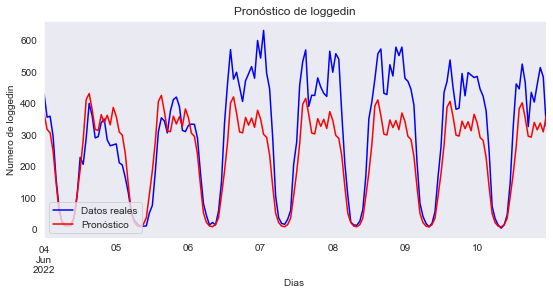

In [13]:
pred_test = results.get_forecast(steps=24*7).predicted_mean
fig, ax = plt.subplots(figsize=(9, 4))
test.plot(color='blue')
pred_test.plot(color='red')
plt.grid()
ax.legend()
plt.title('Pronóstico de loggedin')
plt.ylabel('Numero de loggedin')
plt.xlabel('Dias ')
plt.legend(('Datos reales', 'Pronóstico'),
           loc='lower left')


## Modelo 2: Modelo de Regresión Random Forest Regressor 
Para el segundo modelo se creó la estructura con los datos de la serie de las variables que tendría el semestre académico

In [14]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()
rg.fit(X_train, y_train)


RandomForestRegressor()

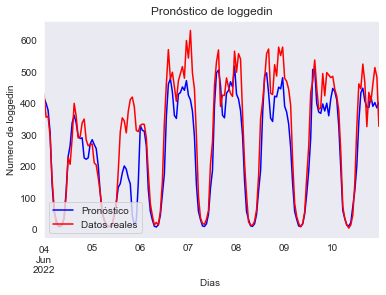

In [15]:
y_pred_test = pd.DataFrame(rg.predict(X_test))
y_pred_test.index = y_test.index
y_pred_test.plot(color='blue')
y_test.plot(color='red')
plt.grid()
plt.title('Pronóstico de loggedin')
plt.ylabel('Numero de loggedin')
plt.xlabel('Dias ')
plt.legend(('Pronóstico', 'Datos reales'),
           loc='lower left')


Los dos modelos están mostrando predicciones cercanos a sus valores reales, por lo que a primera impresión se considera son resultados acertados.  

# Presente métricas de desempeño de los modelos que entreno y realice una conclusión de lo que observa en caso.

Se calcula para cada modelo el R2 y el MSE.

## Modelo 1. Serie de Tiempo Modelo Sarima

In [16]:
# Metricas de error
from sklearn.metrics import mean_squared_error, r2_score
# MSE
print("MSE: %.2f" % mean_squared_error(test, pred_test))
# R2
print("Metrica de R2:", r2_score(test, pred_test))


MSE: 12380.38
Metrica de R2: 0.6499660984356257


## Modelo 2. Modelo de Regresión Random Forest Regressor

In [17]:
y_pred_test = pd.DataFrame(rg.predict(X_test))
# Metricas de error
# MSE
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_test))
# R2
print("Metrica de R2:", r2_score(y_test, y_pred_test))


MSE: 7838.92
Metrica de R2: 0.7783680417887016


El Modelo de regresión random forest regressor tiene mejor MSE y mejor R2 que la serie de tiempo con modelo SARIMA, ambos modelos presentan estimaciones cercanas a los datos reales, sin embargo el primer modelo tiende a subestimar las predicciones, mientras que el segundo se puede ver que las esta sobrestimado, en este caso por las métricas se recomienda quedarse con el segundo modelo. 

# Realice una búsqueda de hiper-parametros (“la malla”) de acuerdo con el modelo que esté empleando. 

Para el caso de la serie de tiempo se consideraron varios modelos con estructuras diferentes en los parametros finalmete el modelo que se quedo fue el del menor AIC, para el cual se ilustra nuevamente las estiamciones resultados de aplicarr el modelo. 

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
x = train
# instanciar modelo
sarima_model = SARIMAX(x, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
# ajustar modelo
results = sarima_model.fit()
# mirar el AIC
results.aic


18459.12388335327

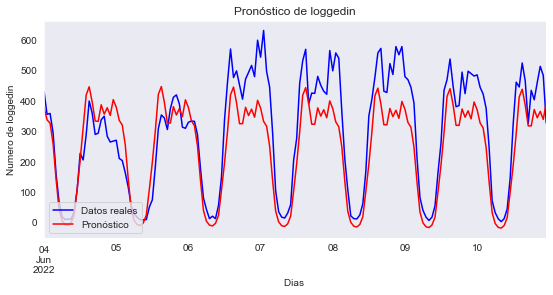

In [19]:
pred_test = results.get_forecast(steps=24*7).predicted_mean
fig, ax = plt.subplots(figsize=(9, 4))
test.plot(color='blue')
pred_test.plot(color='red')
plt.grid()
ax.legend()
plt.title('Pronóstico de loggedin')
plt.ylabel('Numero de loggedin')
plt.xlabel('Dias ')
plt.legend(('Datos reales', 'Pronóstico'),
           loc='lower left')


Para el segundo modelo se incluyo la información de festivos y ademas se mejoraron las estimaciones al incluir información de periodos y dias de los periodos academicos, pero estos cambios fueron realizads directamente en el punto dos.
En general se observo estiamciones mas cercanas al agregar los paramertros optimos. 

# Presente las métricas de desempeño de los modelos con sus parámetros óptimos.
Se calcula nuevamente el MSE Y R2

In [20]:
# Metricas de error
from sklearn.metrics import mean_squared_error, r2_score
# MSE
print("MSE: %.2f" % mean_squared_error(test, pred_test))
# R2
print("Metrica de R2:", r2_score(test, pred_test))


MSE: 9787.61
Metrica de R2: 0.7232722445144837


Si mejoraron las estimaciones al incluir los parámetros óptimos, al incluir una estructura en la serie de tiempo con parámetros optimas  las estimaciones mejoran dado que se acercan más a la realidad de la serie de tiempos 

# Elija el mejor modelo de los que optimizó. Ahora, con esa configuración, entrene el modelo con todo el conjunto de datos

In [21]:
# Todos los datos
from sklearn.ensemble import RandomForestRegressor
DatosFinal = df[['dayofsemester', 'court', 'dayofcuort', 'monthh',
                 'dayofmonth', 'weekk', 'dayofweek',
                 'hourr', 'holidayss', 'loggedin']]
rg = RandomForestRegressor()
rg.fit(DatosFinal[['dayofsemester', 'court', 'dayofcuort', 'monthh',
                   'dayofmonth', 'weekk', 'dayofweek',
                   'hourr', 'holidayss']], DatosFinal['loggedin'])


RandomForestRegressor()

# Guarde el modelo en formato pkl. Este debe adjuntarlo.

In [22]:
# UTILIZANDO pickle

import pickle
from sklearn import svm
##############################
# GUARDAMMOS MODELO con pickle
##############################
# Escribir modelo
with open('model.pkl', 'wb') as f:
    pickle.dump(rg, f)


# Guarde el dataset con todas las transformaciones de preprocesamiento que acabó de utilizar.

In [23]:
# Creación DataFrame:
df_data = pd.DataFrame(DatosFinal)

# Guarda datos en CSV:
df_data.to_csv('DatosFinal2.csv')


In [24]:
import joblib
joblib.dump(rg,'model2.pkl')

['model2.pkl']

In [25]:
from pydantic import BaseModel as BM
from pydantic import Field
from typing import Literal
from datetime import timedelta

class InputModel(BM):
    """
    Este modelo define las entradas que debera ingresar el usuario
    """
    # edad : int = Field(ge=10,le=100, description = "Aqui se escribe la edad en años")
    # departamento : Literal["Quimica", "biologia", "Ing. Industrial"]

    dia : int = Field(ge=1, le=31)
    mes : int = Field(ge=1, le=12)
    anio : int = Field(ge=2022)
    hora : int = Field(ge=0, le=24)

    # fecha_df =    str(dia)+'-'+str(mes)+'-'+str(anio)+' '+str(hora)+':00:00'


    class Config:
        scheme_extra = {
            "example": {

                'dia': 10,
                'mes': 9,
                'anio': 10,
                'hora': 10,
            }
        }


class OutputModel(BM):
    """
    Este modelo define las salidas que verá el usuario
    """
    cantidad_logueo: int = Field(
        ge=0, le=10000000000, description="Aqui se escribe la cantidad de logueos de salida en una fecha dada")

    class Config:
        scheme_extra = {
            "example": {
                "cantidad_logueo": 100,
            }
        }


In [26]:
dia= 23
mes= 3
anio= 2022
hora= 0

In [27]:
InputModel(
    dia=  dia,
    mes= mes,
    anio= anio,
    hora=  hora
)


InputModel(dia=23, mes=3, anio=2022, hora=0)

In [28]:

def transfor_data_entrada(dia, mes, anio, hora):

    warnings.filterwarnings('ignore')

    fecha_df = pd.DataFrame(columns=['fecha_hora'], data =[[str(dia)+'-'+str(mes)+'-'+str(anio)+' '+str(hora)+':00:00']])
    fecha_df['fecha_hora'] = pd.to_datetime(fecha_df['fecha_hora'])
    fecha_df.set_index('fecha_hora', inplace=True)

    fecha_df['dayofweek'] = fecha_df.index.dayofweek  # Dia de la semana
    # Mes (Numero de meses contados en 30 dias)
    fecha_df['monthh'] = (fecha_df.index.day_of_year-80)//30+1
    fecha_df['weekk'] = fecha_df.index.weekofyear-11  # Numero de la semana del semestre
    fecha_df['hourr'] = fecha_df.index.hour  # Hora del dia
    fecha_df['court'] = (fecha_df.index.day_of_year-80)//46+1  # corte academico en el semestre
    fecha_df['dayofsemester'] = fecha_df.index.day_of_year-80  # Dia en el semestre
    fecha_df['dayofmonth'] = fecha_df['dayofsemester'] - 30*(fecha_df['monthh']-1)  # Dia en el mes
    fecha_df['dayofcuort'] = fecha_df['dayofsemester'] - 46*(fecha_df['court']-1)  # Dia en el corte
    fecha_df['serie'] = fecha_df.index.date
    co_holidays = holidays.CO()  # Dias festuvos
    fecha_df['holidayss'] = np.where(fecha_df['serie'].isin(
        co_holidays), '1', '0')  # 1 si es festivo

    return fecha_df

# transfor_data_entrada(dia, mes, anio, hora)

In [29]:
data_predic = pd.DataFrame(columns=X_test.columns, data=[ [ transfor_data_entrada(dia, mes, anio, hora)[x][0] for x in X_test.columns] ])


In [30]:
import joblib

class APIModelBackEnd:
    
    def __init__(self, dia,mes,anio,hora):
        self.dia= dia
        self.mes= mes
        self.anio= anio
        self.hora= hora

    def cargar_modelo(self, nombre_modelo: str = 'model2.pkl'):
        self.model = joblib.load(nombre_modelo)


    def preparar_datos_modelo(self):
        dia = self.dia
        mes = self.mes
        anio = self.anio
        hora = self.hora

        warnings.filterwarnings('ignore')

        fecha_df = pd.DataFrame(columns=['fecha_hora'], data =[[str(dia)+'-'+str(mes)+'-'+str(anio)+' '+str(hora)+':00:00']])
        fecha_df['fecha_hora'] = pd.to_datetime(fecha_df['fecha_hora'])
        fecha_df.set_index('fecha_hora', inplace=True)

        fecha_df['dayofweek'] = fecha_df.index.dayofweek  # Dia de la semana
        # Mes (Numero de meses contados en 30 dias)
        fecha_df['monthh'] = (fecha_df.index.day_of_year-80)//30+1
        fecha_df['weekk'] = fecha_df.index.weekofyear-11  # Numero de la semana del semestre
        fecha_df['hourr'] = fecha_df.index.hour  # Hora del dia
        fecha_df['court'] = (fecha_df.index.day_of_year-80)//46+1  # corte academico en el semestre
        fecha_df['dayofsemester'] = fecha_df.index.day_of_year-80  # Dia en el semestre
        fecha_df['dayofmonth'] = fecha_df['dayofsemester'] - 30*(fecha_df['monthh']-1)  # Dia en el mes
        fecha_df['dayofcuort'] = fecha_df['dayofsemester'] - 46*(fecha_df['court']-1)  # Dia en el corte
        fecha_df['serie'] = fecha_df.index.date
        co_holidays = holidays.CO()  # Dias festuvos
        fecha_df['holidayss'] = np.where(fecha_df['serie'].isin(co_holidays), '1', '0')  # 1 si es festivo

        data_predic = pd.DataFrame(columns=X_test.columns, data=[ [ fecha_df[x][0] for x in X_test.columns] ])

        return data_predic
        

    def predecir(self):
        self.cargar_modelo()
        x = self.preparar_datos_modelo()
        predicccion = pd.DataFrame(self.model.predict(x)).rename(columns={0:'cantidad_logueo'})

        return predicccion


In [31]:
first_model = APIModelBackEnd(dia, mes, anio, hora)
first_model.predecir()

,cantidad_logueo
0,70.73


In [32]:
from fastapi import FastAPI
from typing import List

app = FastAPI(title="Mi  API de ML", version="1.0.1")


@app.post("/predict", response_model=List[OutputModel])
def predecir_probabilidad(inputs: List[InputModel]):
    respuestas = list()
    for Input in inputs:
        first_model = APIModelBackEnd(
            Input.dia, 
            Input.mes, 
            Input.anio,
            Input.hora
        )

        respuestas.append(first_model.predecir()[0])

    return respuestas

In [33]:
import requests

# dia= 23
# mes= 3
# anio= 2022
# hora= 0
 
request_data = [
    {
        'dia': dia,
        'mes': mes,
        'anio': anio,
        'hora': hora
    }
]

data_cleaned = str(request_data).replace("'", '"')
url_api = "http://127.0.0.1:8000/predict"

pred = requests.post(url=url_api, data=data_cleaned).text

pred_df = pd.read_json(pred)

ConnectionError: HTTPSConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026B2B733970>: Failed to establish a new connection: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión'))

In [ ]:
df

,loggedin,dayofweek,monthh,weekk,hourr,court,dayofsemester,dayofmonth,dayofcuort,serie,holidayss
timecreated,,,,,,,,,,,
2022-03-23 00:00:00,65,2,1,1,0,1,2,2,2,2022-03-23,0
2022-03-23 01:00:00,59,2,1,1,1,1,2,2,2,2022-03-23,0
2022-03-23 02:00:00,70,2,1,1,2,1,2,2,2,2022-03-23,0
2022-03-23 03:00:00,114,2,1,1,3,1,2,2,2,2022-03-23,0
2022-03-23 04:00:00,60,2,1,1,4,1,2,2,2,2022-03-23,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10 19:00:00,403,4,3,12,19,2,81,21,35,2022-06-10,0
2022-06-10 20:00:00,460,4,3,12,20,2,81,21,35,2022-06-10,0
2022-06-10 21:00:00,513,4,3,12,21,2,81,21,35,2022-06-10,0


In [ ]:

def grafico_barra(df, x='serie', y='loggedin', title = 'Número de Logueos de Cintia en Función del Tiempo'):

    import plotly.express as px

    fig = px.bar(
                    df=df, 
                    x= x, 
                    y = y,
                    color_discrete_sequence = ['Blue'],
                    title = title
                )

    fig.update_layout(yaxis_title = 'Cantidad de Logues',xaxis_title = 'Fecha')
    # fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)','paper_bgcolor':'rgba(0,0,0,0)' })

    fig.update_xaxes(
        rangeslider_visible= True,
        rangeselector = dict(
            buttons = list([
                dict(step='day', stepmode='backward',label='1 dia', count =1),
                dict(step='day', stepmode='backward',label='1 semana', count =7),
                dict(step='month', stepmode='backward',label='1 mes', count =1),
                dict(step='month', stepmode='backward',label='3 mes', count =3),
                dict(step='all', label='Todos')
            ])
        ),
    )

    fig.update_xaxes(dtick = 'M1', ticklabelmode = 'period', tickformat='%d %b\n%Y')


fig.show()